In [1]:
# 통계 분석 기법을 이용한 가설 검정

In [1]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

# 기술 통계 분석
mpg.query('category in ["compact", "suv"]').groupby('category', as_index = False).agg(n = ('category', 'count'),
                                                                                     mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [2]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [3]:
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

Ttest_indResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21)

In [4]:
mpg.query('fl in ["r", "p"]').groupby('fl', as_index = False).agg(n = ('fl', 'count'),
                                                                 mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [5]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

stats.ttest_ind(regular, premium, equal_var = True)

Ttest_indResult(statistic=-1.066182514588919, pvalue=0.28752051088667036)

In [6]:
# 상관분석

In [7]:
economics = pd.read_csv('economics.csv')

economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [8]:
stats.pearsonr(economics['unemploy'], economics['pce'])

(0.614517614193208, 6.773527303291701e-61)

In [9]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
car_cor = mtcars.corr()
car_cor = round(car_cor, 2)
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [11]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '120',
                    'figure.figsize' : [7.5, 5.5]})

<AxesSubplot:>

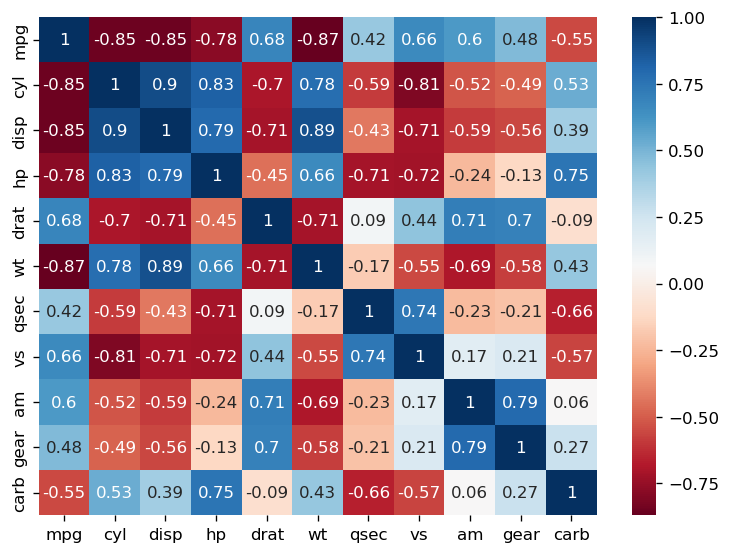

In [12]:
import seaborn as sns
sns.heatmap(car_cor,
           annot = True,
           cmap = 'RdBu')

In [13]:
# 대각 행렬 제거

In [14]:
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

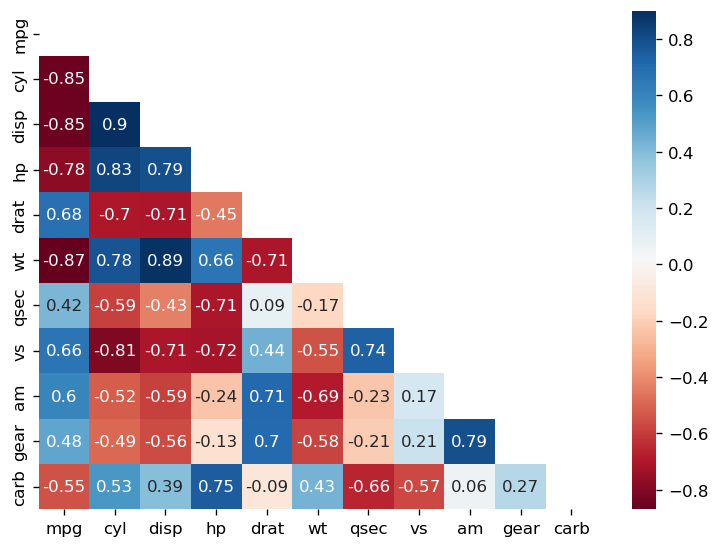

In [16]:
sns.heatmap(data = car_cor,
           annot = True,
           cmap = 'RdBu',
           mask = mask)

<AxesSubplot:>

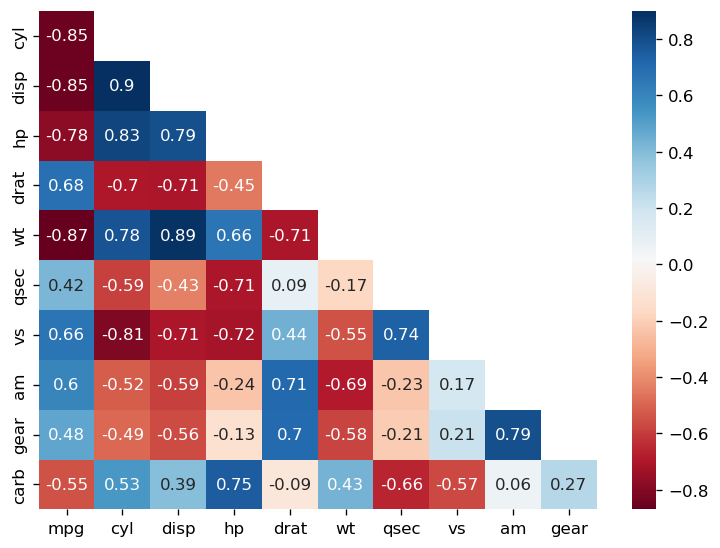

In [17]:
mask_new = mask[1:, :-1]
cor_new = car_cor.iloc[1:,:-1]

sns.heatmap(data = cor_new,
           annot = True,
           cmap = 'RdBu',
           mask = mask_new)

<AxesSubplot:>

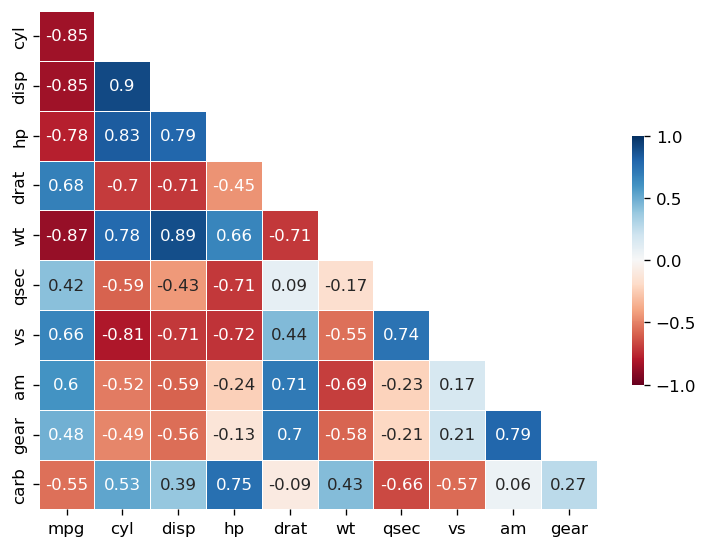

In [18]:
sns.heatmap(data = cor_new,
           annot = True,
           cmap = 'RdBu',
           mask = mask_new,
           linewidths = .5,
           vmax = 1,
           vmin = -1,
           cbar_kws = {"shrink" : .5})